In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv('C:\\Users\\ASUS\\Desktop\\Chocolate Sales.csv')

In [3]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
df.isna().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%b-%y')

In [8]:
df['Amount']=df['Amount'].str.replace('$','',regex=False).str.replace(',','',regex=False).str.strip().astype(float)

In [9]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


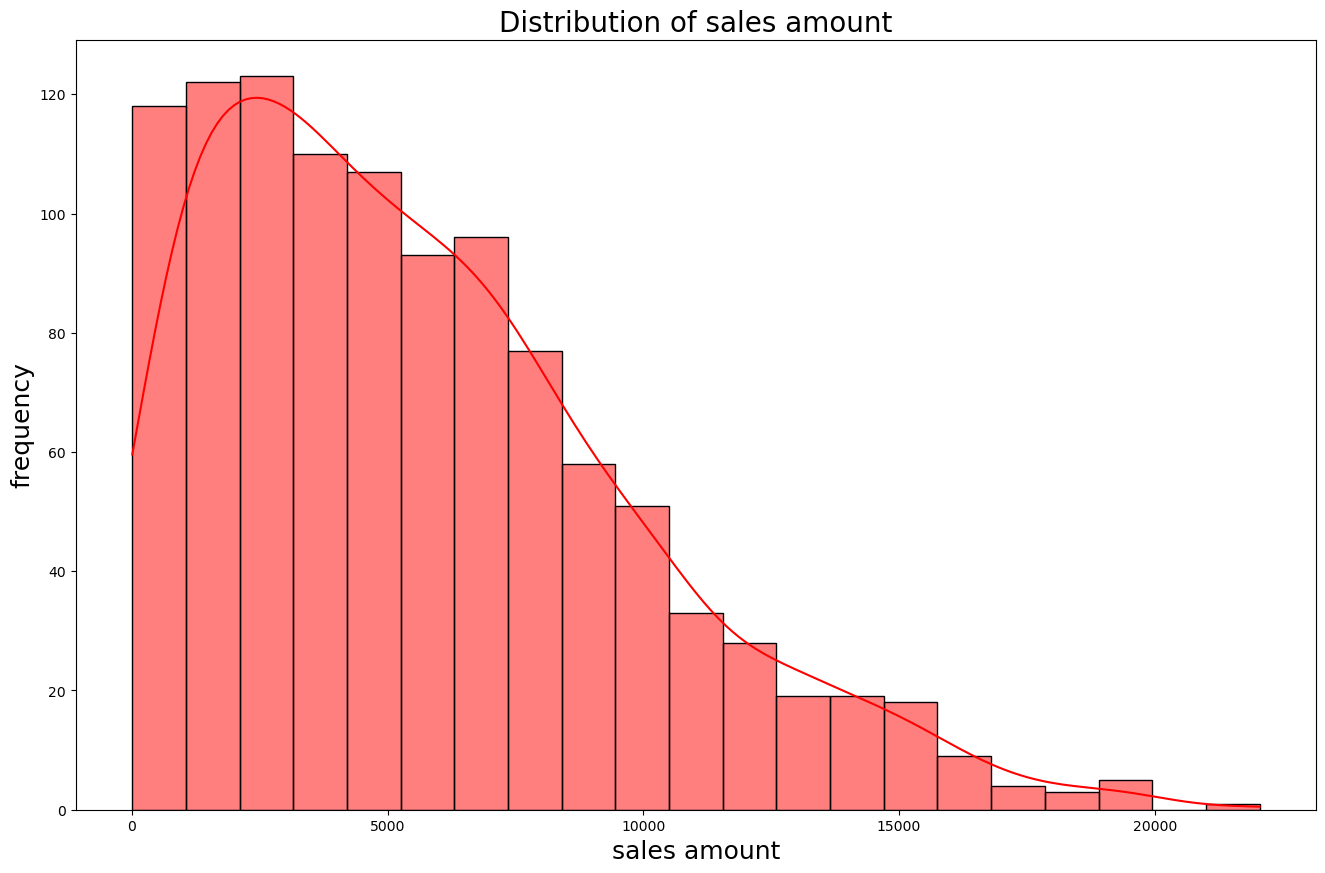

In [14]:
#distribution of sales amount
plt.figure(figsize=(16,10))
sns.histplot(df['Amount'],kde=True,color='red')
plt.title('Distribution of sales amount',fontsize=20)
plt.xlabel('sales amount',fontsize=18)
plt.ylabel('frequency',fontsize=18)
plt.show()

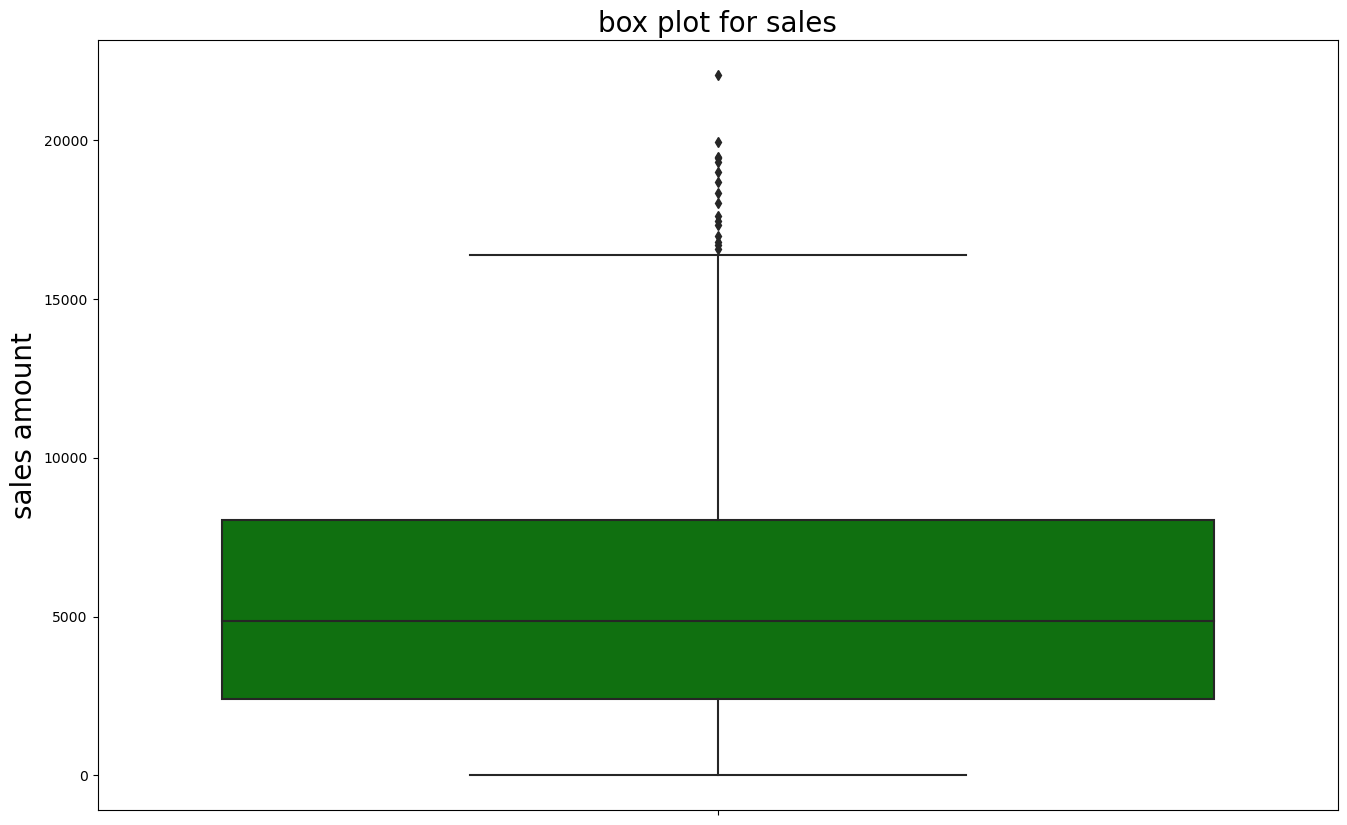

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(y=df['Amount'],color='green')
plt.title('box plot for sales',fontsize=20)
plt.ylabel('sales amount',fontsize=20)
plt.show()

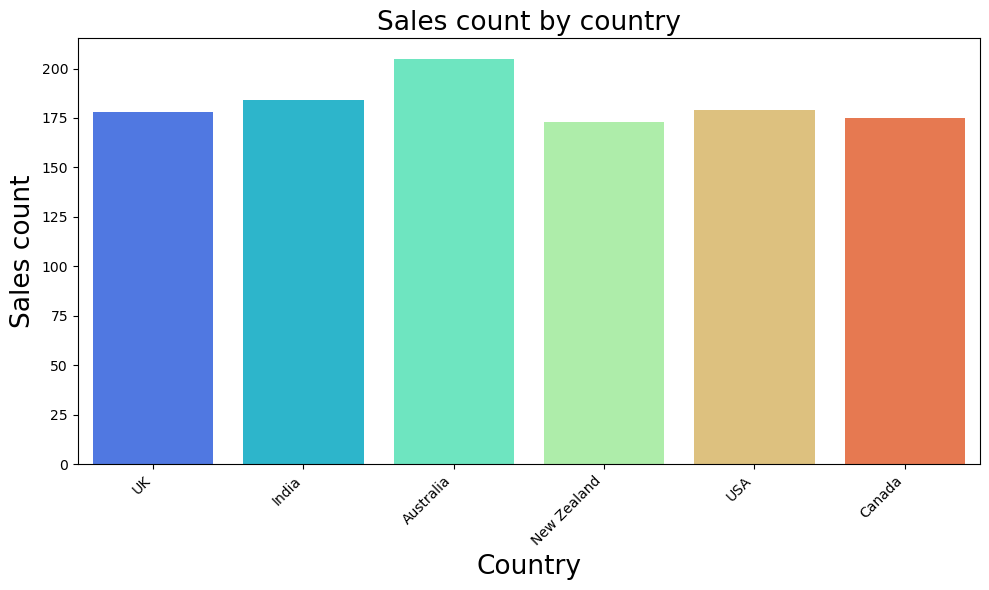

In [18]:
#sales by country
plt.figure(figsize=(10,6))
sns.countplot(x='Country',data=df,palette='rainbow')
plt.title('Sales count by country',fontsize=19)
plt.xlabel('Country',fontsize=19)
plt.ylabel('Sales count',fontsize=19)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


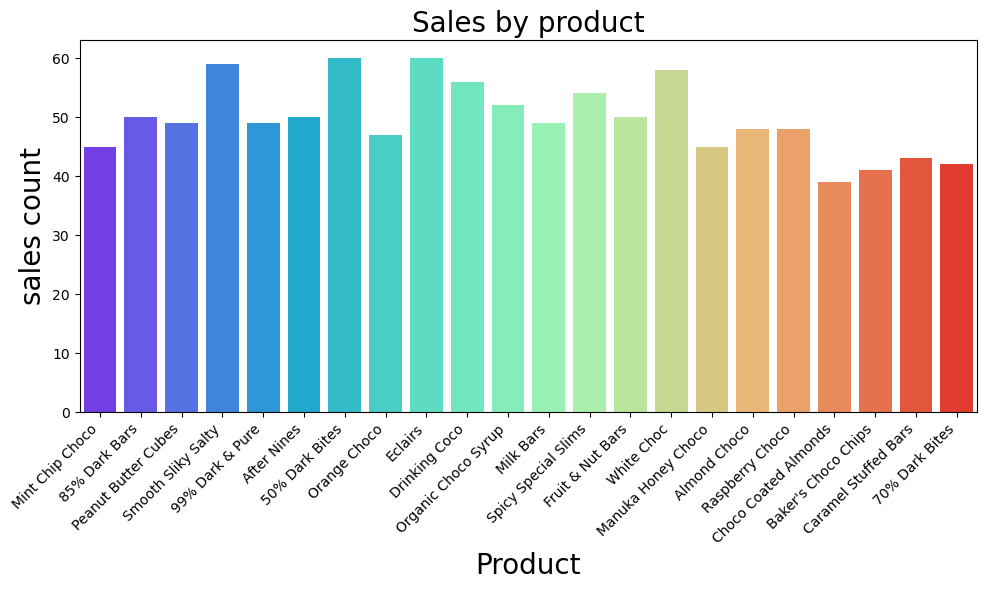

In [23]:
#sales by product
plt.figure(figsize=(10,6))
sns.countplot(x='Product',data=df,palette='rainbow')
plt.title('Sales by product',fontsize=20)
plt.xlabel('Product',fontsize=20)
plt.ylabel('sales count',fontsize=20)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

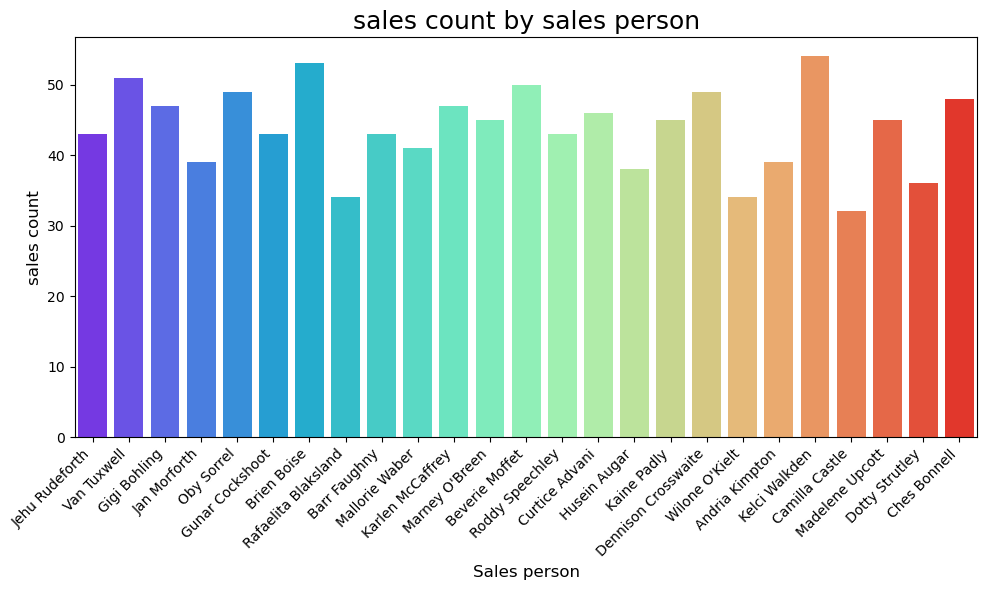

In [25]:
#sales count  by sales person
plt.figure(figsize=(10,6))
sns.countplot(x='Sales Person',data=df,palette='rainbow')
plt.title('sales count by sales person', fontsize=18)
plt.xlabel('Sales person',fontsize=12)
plt.ylabel('sales count',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

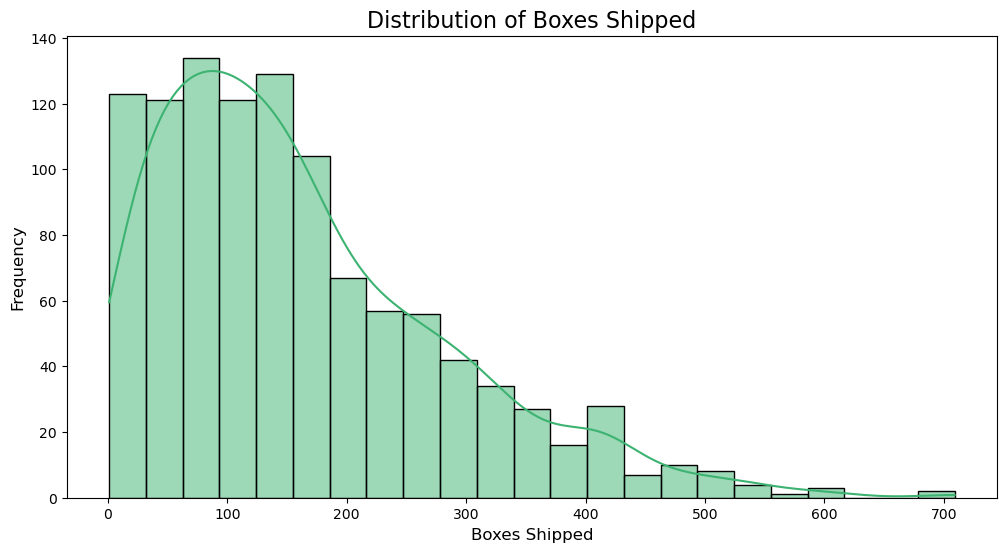

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Boxes Shipped'], kde=True, color='mediumseagreen')
plt.title('Distribution of Boxes Shipped', fontsize=16)
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


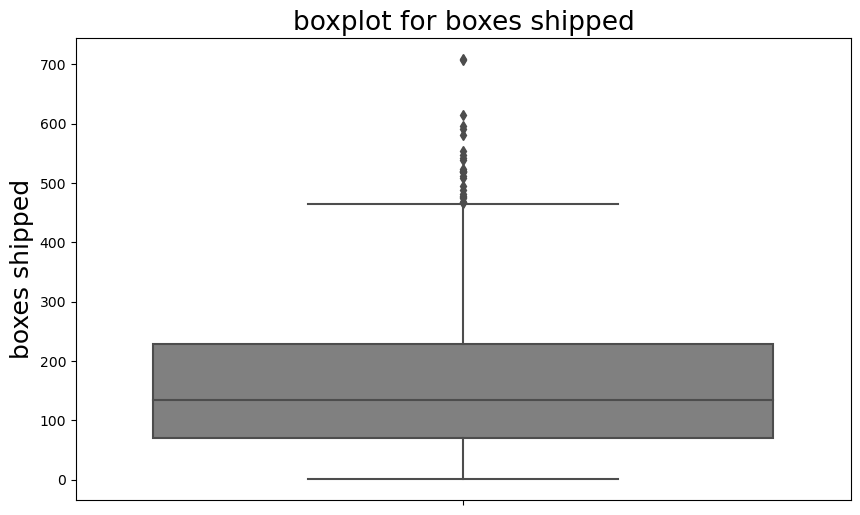

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Boxes Shipped'],color='grey')
plt.title('boxplot for boxes shipped',fontsize=19)
plt.ylabel('boxes shipped',fontsize=18)
plt.show()
        

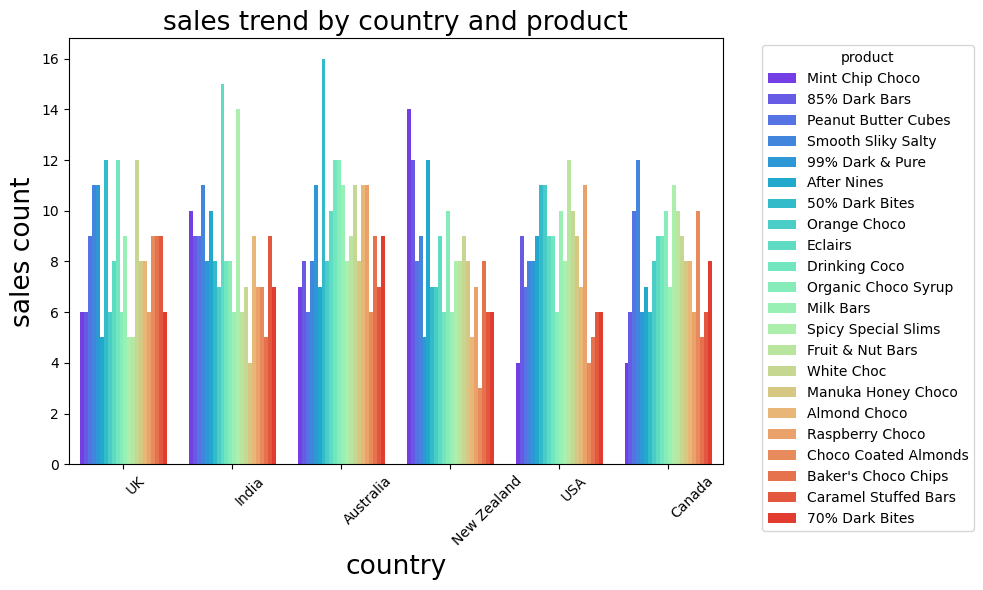

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country',hue='Product',data=df,palette='rainbow')
plt.title('sales trend by country and product',fontsize=19)
plt.xlabel('country',fontsize=19)
plt.ylabel('sales count',fontsize=19)
plt.xticks(rotation=45,ha='left')
plt.legend(title='product',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
sales_person_sales = df.groupby('Sales Person').agg({'Amount': ['sum', 'mean']}).reset_index()
sales_person_sales.columns = ['Sales Person', 'Total Sales', 'Average Sales']

plt.figure(figsize=(14,6))
sns.barplot(x = 'Sales Person', y = 'Total Sales', data = sales_person_sales, palette = 'cividis')
plt.title('Total Sales by Sales Person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

TypeError: Could not convert $2,163 $2,653 $6,307 $4,438 $1,603 $959 $14,504 $7,154 $1,456 $8,911 $3,374 $1,554 $4,935 $4,186 $8,204 $2,366 $6,678 $8,393 $8,848 $14,336 $13,482 $308 $3,955 $4,858 $1,155 $8,169 $7,924 $9,037 $1,155 $9,744 $4,067 $329 $3,192 $2,149 $6,559 $10,262 $301 $1,127 $952  to numeric